In [190]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import importlib
from pymoo.algorithms.moo.sms import SMSEMOA

import seaborn as sns
import time

from sklearn.cluster import KMeans
import sklearn

# my modules

import sys
#sys.path.insert(0, r"C:\Users\johnsorensen\Documents\Python Package")
sys.path.insert(0, r"/Users/johnsorensen/DataspellProjects/PortfolioResampling")


matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.dpi'] = 75

%matplotlib inline

In [236]:
from optimization_new import problem, metrics, resampling, constraints
from optimization_new import visualizations as vis



importlib.reload(constraints)
importlib.reload(metrics)
importlib.reload(problem)
importlib.reload(resampling)
importlib.reload(vis)

from optimization_new.resampling import RankResampler, IIDBootstrap, GuassianNoise

In [18]:
sectors = web.DataReader("10_Industry_Portfolios", "famafrench", start = "1926-07", end = "2023-06")[0]
sectors.columns = sectors.columns.str.strip()
sectors /= 100
sectors = sectors.iloc[-120:]

In [57]:
#shared_folder = "F:\SITFO\Risk\Corpus and Drawdown"
#saa_returns = pd.read_excel(shared_folder + r"\SAA data.xlsx", "Data", header = [0, 1])
#saa_returns.index = pd.period_range(start = "1990-02", end = "2023-04", freq = "M")
#saa_returns = saa_returns.drop("Portfolio", axis = 1, level = 1).dropna()
#saa_returns.columns.names = ['GRID Bucket', 'Asset Class']

#weights = pd.read_excel(shared_folder + r"\Weight Scenarios.xlsx",
#                               "Weights", index_col = [0, 1], nrows = 10)

#policy_weights = weights["Policy Weights"]

#saa_returns /= 100

In [237]:
def problem_func(returns):

    # historical mean and covariance
    mean = returns.mean(axis = 0).values
    
    m1 = metrics.Volatility(returns.cov().values, annualization = "Sqrt")
    m2 = metrics.AvgArithReturn(mu = mean, annualization = "Compound")
    
    return problem.PortfolioProblem(returns, [m1, m2])
    
    
#true_opt_obj = problem_func(sectors)
#true_opt_obj.optimize(n_pop = 150, n_gen = 100, algorithm = SMSEMOA)

In [238]:
resampler = RankResampler(problem_func, GuassianNoise(sectors, sigma = 0.02))

In [239]:
resampler.optimize(n_resamples = 100, n_pop = 50, n_gen = 50)

In [240]:
resampler.aggregate_frontier()

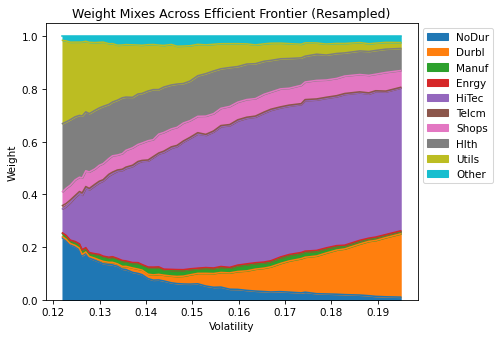

In [241]:
#w, F = resampler.get_aggregate_frontier()
vis.plot_portfolio_mixes_2d(resampler)

In [6]:
#rolling_resampler = resampling.RollingWindow(problem_func, args_to_resample = [saa_returns],
#                                             gap_size = 12, ascending = False)

In [7]:
#rolling_resampler.resample()
